In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

## Load Data:

In [2]:
train = pd.read_csv("train.csv", header=0)
test = pd.read_csv("test.csv", header=0)
validate = pd.read_csv("validate.csv", header=0)

In [3]:
train.dtypes

Number_of_valued_Kneset_members                         float64
Yearly_IncomeK                                          float64
Overall_happiness_score                                 float64
Avg_Satisfaction_with_previous_vote                     float64
Garden_sqr_meter_per_person_in_residancy_area           float64
Weighted_education_rank                                 float64
Vote                                                     object
Number_of_valued_Kneset_members_isNull                    int64
Yearly_IncomeK_isNull                                     int64
Overall_happiness_score_isNull                            int64
Avg_Satisfaction_with_previous_vote_isNull                int64
Garden_sqr_meter_per_person_in_residancy_area_isNull      int64
Weighted_education_rank_isNull                            int64
Most_Important_Issue_int                                  int64
Will_vote_only_large_party_int                            int64
dtype: object

## Arrange Classifiers:

In [4]:
names = ["Nearest Neighbors", "Naive Bayes", "Decision Tree", "Perceptron", 
         "Linear SVM OVO", "Linear SVM OVR", "MLP"] 

In [5]:
classifiers = {
    KNeighborsClassifier(1):"Nearest Neighbors",
    GaussianNB():"Naive Bayes",
    DecisionTreeClassifier(max_depth=5):"Decision Tree",
    Perceptron(n_iter=100):"Perceptron",
    SVC(kernel="linear", C=1):"Linear SVM OVO",
    LinearSVC(C=1):"Linear SVM OVR",
    MLPClassifier(verbose=0, activation='relu', hidden_layer_sizes=(50, 25, 10), 
                  random_state=0, max_iter=500, solver='sgd', 
                  learning_rate='invscaling', momentum=.9,
                  nesterovs_momentum=True, learning_rate_init=0.2):"MLP"}
    

## Arrange data sets:

In [6]:
X_train = train.drop(['Vote'],1)
Y_train = train.Vote
X_test = test.drop(['Vote'],1)
Y_test = test.Vote
X_validate = validate.drop(['Vote'],1)
Y_validate = validate.Vote

## Run over classifiers:

In [7]:
test_scores = {"Nearest Neighbors":0, "Naive Bayes":0, "Decision Tree":0, "Perceptron":0, 
         "Linear SVM OVO":0, "Linear SVM OVR":0, "MLP":0}
test_confusion = {"Nearest Neighbors":0, "Naive Bayes":0, "Decision Tree":0, "Perceptron":0, 
         "Linear SVM OVO":0, "Linear SVM OVR":0, "MLP":0}
test_cross = {"Nearest Neighbors":0, "Naive Bayes":0, "Decision Tree":0, "Perceptron":0, 
         "Linear SVM OVO":0, "Linear SVM OVR":0, "MLP":0}

In [8]:
# iterate over classifiers

for clf in classifiers:
    clf.fit(X_train, Y_train)
    test_scores[classifiers[clf]] = clf.score(X_test, Y_test)
    test_cross[classifiers[clf]] = cross_val_score(clf, X_test, Y_test, cv=5).mean()
    predictions = clf.predict(X_test)
    conf = confusion_matrix(Y_test, predictions, labels=None, sample_weight=None)
    n = len(conf[0])
    test_confusion[classifiers[clf]] = sum(conf[i][i] for i in range(n))


/Users/odedgolden/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/odedgolden/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/odedgolden/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/odedgolden/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/odedgolden/an

In [9]:
test_cross

{'Decision Tree': 0.77891430384921656,
 'Linear SVM OVO': 0.87945114981257988,
 'Linear SVM OVR': 0.56795140979889014,
 'MLP': 0.16833321038084054,
 'Naive Bayes': 0.61868688523749638,
 'Nearest Neighbors': 0.67548762948840058,
 'Perceptron': 0.35950076901209893}

In [10]:
test_scores

{'Decision Tree': 0.77500000000000002,
 'Linear SVM OVO': 0.89600000000000002,
 'Linear SVM OVR': 0.751,
 'MLP': 0.17699999999999999,
 'Naive Bayes': 0.82999999999999996,
 'Nearest Neighbors': 0.76800000000000002,
 'Perceptron': 0.63949999999999996}

In [11]:
test_confusion

{'Decision Tree': 1550,
 'Linear SVM OVO': 1792,
 'Linear SVM OVR': 1502,
 'MLP': 354,
 'Naive Bayes': 1660,
 'Nearest Neighbors': 1536,
 'Perceptron': 1279}

## Choose classifiers:

The best score is for Linear SVM OVO

In [12]:
svm = classifiers.keys()[classifiers.values().index('Linear SVM OVO')]

## Predict Election Results:

In [13]:
predictions = svm.predict(X_test)
parties = Y_train.unique()

In [14]:
# predictions
parties

array(['Greens', 'Purples', 'Browns', 'Pinks', 'Whites', 'Blues', 'Reds',
       'Yellows', 'Greys', 'Oranges'], dtype=object)

In [18]:
results = {'Purples':0, 'Browns':0, 'Greens':0, 'Blues':0, 'Whites':0, 'Pinks':0, 'Reds':0,
       'Oranges':0, 'Yellows':0, 'Greys':0}
true_results = {'Purples':0, 'Browns':0, 'Greens':0, 'Blues':0, 'Whites':0, 'Pinks':0, 'Reds':0,
       'Oranges':0, 'Yellows':0, 'Greys':0}

In [19]:
for p in predictions:
    for party in parties:
        if p==party:
            results[party]= results[party]+1

In [20]:
results

{'Blues': 179,
 'Browns': 422,
 'Greens': 338,
 'Greys': 100,
 'Oranges': 114,
 'Pinks': 210,
 'Purples': 376,
 'Reds': 111,
 'Whites': 48,
 'Yellows': 102}

In [22]:
for p in Y_validate:
    for party in parties:
        if p==party:
            true_results[party]= true_results[party]+1

In [23]:
true_results

{'Blues': 174,
 'Browns': 366,
 'Greens': 322,
 'Greys': 104,
 'Oranges': 104,
 'Pinks': 190,
 'Purples': 431,
 'Reds': 125,
 'Whites': 63,
 'Yellows': 121}

## Plot results pie:

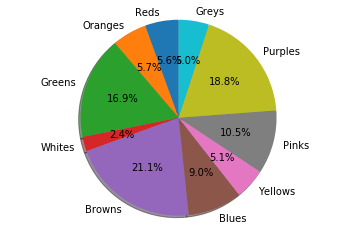

In [24]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = results.keys()
sizes = results.values()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=[0]*len(sizes), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Plot true results pie:

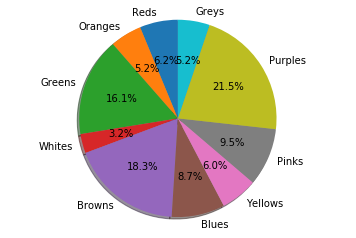

In [25]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = true_results.keys()
sizes = true_results.values()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=[0]*len(sizes), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Confusion Matrix:

In [26]:
confusion_matrix(Y_test, predictions, labels=None, sample_weight=None)

array([[161,   0,   0,   0,   0,   0,   0,   0,   0,  11],
       [  0, 343,   0,   0,   0,   4,   4,   0,   3,   0],
       [  0,   1, 334,   0,   0,   2,   0,   0,   0,   0],
       [  0,   1,   0,  95,   9,   0,   0,   2,   0,   0],
       [  0,   0,   0,   3,  95,   0,   0,   3,   0,   0],
       [  0,  32,   2,   0,   0, 181,   6,   0,   2,   0],
       [  0,  29,   2,   0,   0,   7, 358,   0,  14,   0],
       [  0,   0,   0,   2,  10,   0,   1, 106,   0,   0],
       [  0,  16,   0,   0,   0,  15,   7,   0,  28,   0],
       [ 18,   0,   0,   0,   0,   1,   0,   0,   1,  91]])